In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv('Data/housingdata_train.csv')
df_test = pd.read_csv('Data/housingdata_test.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [5]:
# combine both train and test dataset into one dataframe called df. The df dataframe does not contain the SalePrice
df = pd.concat([df_train.loc[:,:'SaleCondition'],df_test],ignore_index=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-

In [7]:
# display the initial 5 records for df
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [8]:
# Find the number of nulls in all features and sort it by ascending
df.isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
LotFrontage       486
GarageCond        159
GarageQual        159
GarageYrBlt       159
GarageFinish      159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
BsmtHalfBath        2
Utilities           2
Functional          2
BsmtFullBath        2
BsmtFinSF1          1
Exterior1st         1
Exterior2nd         1
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
SaleType            1
                 ... 
YearBuilt           0
OverallCond         0
SaleCondition       0
Heating             0
ExterQual           0
ExterCond           0
YrSold              0
MoSold              0
MiscVal             0
PoolArea            0
ScreenPorch         0
3SsnPorch           0
EnclosedPorch       0
OpenPorchSF         0
WoodDeckSF

In [9]:
null_cols = list(df.columns[df.isnull().any()])

In [10]:
#display all null_cols
null_cols

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

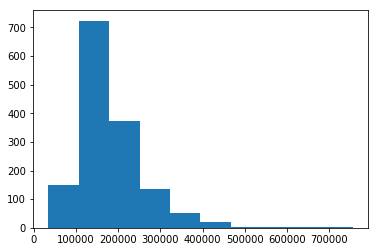

In [11]:
# Check the distriubition of the housing price. It appears like most houses average between 150000 to 200000
plt.hist(df_train['SalePrice'])
plt.show()

In [12]:
df['PoolQC'].value_counts(dropna=False)

NaN    2909
Gd        4
Ex        4
Fa        2
Name: PoolQC, dtype: int64

In [13]:
# Since PoolQc has the most null values, show all rows where PollQc is not null. 
df[df['PoolQC'].notnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,0,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml
810,811,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,0,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal
1170,1171,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,AllPub,...,0,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,0,480,Gd,NaN,NaN,0,1,2008,New,Partial
1386,1387,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,...,440,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal
1423,1424,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,AllPub,...,0,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca
1974,1975,20,RL,106.0,12720,Pave,NaN,Reg,HLS,AllPub,...,216,144,Ex,NaN,NaN,0,2,2008,WD,Normal
2573,2574,20,RL,70.0,18044,Pave,NaN,IR1,HLS,AllPub,...,0,228,Ex,NaN,NaN,0,8,2007,WD,Normal
2710,2711,80,RL,100.0,14330,Pave,NaN,IR1,Low,AllPub,...,0,800,Gd,GdPrv,NaN,0,1,2006,WD,Normal


In [14]:
# show records where PoolQc is notnull and PoolArea is present. We are trying to determing the link between PoolQc and PoolArea.
# It is clear from below that the PoolArea exists (or pool exists in the house) to determine the PoolQc
df[(df.PoolQC.notnull()) & (df.PoolArea >= 0)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,0,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml
810,811,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,0,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal
1170,1171,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,AllPub,...,0,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,0,480,Gd,NaN,NaN,0,1,2008,New,Partial
1386,1387,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,...,440,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal
1423,1424,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,AllPub,...,0,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca
1974,1975,20,RL,106.0,12720,Pave,NaN,Reg,HLS,AllPub,...,216,144,Ex,NaN,NaN,0,2,2008,WD,Normal
2573,2574,20,RL,70.0,18044,Pave,NaN,IR1,HLS,AllPub,...,0,228,Ex,NaN,NaN,0,8,2007,WD,Normal
2710,2711,80,RL,100.0,14330,Pave,NaN,IR1,Low,AllPub,...,0,800,Gd,GdPrv,NaN,0,1,2006,WD,Normal


In [15]:
df.PoolArea.value_counts(dropna=False)

0      2906
561       1
555       1
519       1
800       1
738       1
648       1
576       1
512       1
480       1
444       1
368       1
228       1
144       1
Name: PoolArea, dtype: int64

In [16]:
# there are 3 records that has PoolArea other than 0 but still has no PoolQC information. We are trying to identify the index
#of such recores
PoolQc_Sel = ((df['PoolQC'].isnull()) & (df.PoolArea > 0))

In [17]:
# The PoolQC has both EX and Gd in equal number of records.
#df['PoolQC'].mode()

#0    Ex
#1    Gd

In [18]:
# here I am using the mode (choosing the first index as there are 2 values as mode) to populate the 3 NaN in PoolQc even when 
#PoolArea has a value other than 0. The rest of the Nan will be revisited later.
df.loc[PoolQc_Sel,'PoolQC'] = df.loc[PoolQc_Sel,'PoolQC'].fillna(df['PoolQC'].mode()[0])

In [19]:
# No more Nan in PoolQc when PoolArea is other than 0
((df['PoolQC'].isnull()) & (df.PoolArea > 0)).sum()

0

In [20]:
#Save all column names in a list
all_cols = list(df.columns)

In [21]:
all_cols

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

## Below trying to find the correlation between all numeric fields to SalePrice fields. By default, df.corr() retutns the correlation between all numeric fields.I am extracting only the correlation of all numeric columns agaisnt SalesPrice field. Also, sorting it based on descendig order. This gives us an idea of which features have more impact on the SalesPrice.

In [22]:
# Since only training data has the Sale price, I am finding the correlation on training set
df_train.corr().loc[:,'SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [23]:
# Check the data types of all features that has nulls
df[null_cols].dtypes

MSZoning         object
LotFrontage     float64
Alley            object
Utilities        object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinSF1      float64
BsmtFinType2     object
BsmtFinSF2      float64
BsmtUnfSF       float64
TotalBsmtSF     float64
Electrical       object
BsmtFullBath    float64
BsmtHalfBath    float64
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageCars      float64
GarageArea      float64
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType         object
dtype: object

In [24]:
# since few records for LotFrontage is nan, we need to find a way to fill those nan to proper value based on most closely 
#realted feature. It appears 1stFlrSF and LotArea reasonably correlated to LotFrontage.
df.corr().loc[:,'LotFrontage'].sort_values(ascending=False).head()

LotFrontage    1.000000
LotArea        0.489896
1stFlrSF       0.458247
GrLivArea      0.382462
GarageArea     0.359786
Name: LotFrontage, dtype: float64

In [25]:
#below is the code to handle nulls in the features. 
for i in null_cols:
    if df[i].dtypes == 'object':
#        if i == 'MasVnrType'
#   I am converting all 'None' as nan. Basically trating both None and NaN as same.
        df[i]= np.where(df[i]== 'None', np.nan, df[i])
        df[i] = df[i].fillna('dummy')
        df[i].astype('category')
        
    elif (i == 'MasVnrArea') or (i == 'GarageYrBlt') :
        df[i] = df[i].fillna(0)
    
    elif ((df[i].dtypes == 'float64') or (df[i].dtypes == 'int64')):
        df[i] = df[i].fillna(df[i].mean())
    
#    elif i == 'LotFrontage':
#        df[i] = df[i].fillna(df['LotFrontage'].mean())
        
    

In [26]:
df_new  = pd.get_dummies(df,drop_first=True)

In [27]:
# dropiing Id column as it serves no purpose.
df_new = df_new.drop('Id',axis=1)

In [28]:
df_new.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_dummy,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0


## In the next few steps, I tried normalizing data, but it didn't result in a good prediction. So switching back without normalizing

In [29]:
#from sklearn.preprocessing import Normalizer

In [30]:
##Now that the major preprocessing is done, the next is to Normalize the data as each of the features are in different scales.
## I am going to assume that the distribution of data is not Gaussian (bell curve) so go to Normalize all the feature instead of Standardizing
#nrm = Normalizer()
#normalized_X = nrm.fit_transform(df_new.values)

In [31]:
#normalized_X.shape

In [32]:
#normalized_X

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
# Since all the preprocessing step has been done, now is the time to split the train vs test as provided in the input.
#X = normalized_X[:1460,:]
#y = df_train['SalePrice'].values

In [35]:
#X.shape

In [36]:
#y.shape

In [37]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
from sklearn import linear_model

In [39]:
#lg = linear_model.LinearRegression()

In [40]:
#lg.fit(X_train,y_train)

In [41]:
#y_pred = lg.predict(X_test)

In [42]:
#y_pred

In [43]:
X_train, X_test, y_train, y_test = train_test_split(df_new.loc[:1459,:],df_train['SalePrice'], test_size=0.2, random_state=42)

In [44]:
lg = linear_model.LinearRegression()

In [45]:
lg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
y_pred_lg = lg.predict(X_test)

In [47]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_dummy,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
892,20,70.0,8414,6,8,1963,2003,0.0,663.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1105,60,98.0,12256,8,5,1994,1995,362.0,1032.0,0.0,...,0,0,0,1,0,0,0,0,1,0
413,30,56.0,8960,5,6,1927,1950,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
522,50,50.0,5000,6,7,1947,1950,0.0,399.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1036,20,89.0,12898,9,5,2007,2008,70.0,1022.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [48]:
df_train.loc[[892,1105,413,522,1036],'SalePrice']

892     154500
1105    325000
413     115000
522     159000
1036    315500
Name: SalePrice, dtype: int64

In [49]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [50]:
rms_lg = sqrt(mean_squared_error(y_test, y_pred_lg))

In [51]:
rms_lg

83088.1594026928

In [52]:
import xgboost as xgb

In [131]:
xgb_reg = xgb.XGBRegressor(objective='reg:linear',n_estimators=1000,seed=142)

In [132]:
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=142,
       silent=True, subsample=1)

In [133]:
y_pred_xgb = xgb_reg.predict(X_test)

In [134]:
rms_xgb = sqrt(mean_squared_error(y_test, y_pred_xgb))

In [135]:
rms_xgb

29096.21016494465

## It is clear that XGboost performed better over the simple linear regression model with RMSE being 29378

In [59]:
# Now is the time to apply our model against the Test dataset. 

In [136]:
# retraining with full training dataset
xgb_reg = xgb.XGBRegressor(objective='reg:linear',n_estimators=5000,seed=142)

In [137]:
xgb_reg.fit(df_new.loc[:1459,:],df_train['SalePrice'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=5000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=142,
       silent=True, subsample=1)

In [62]:
#import pickle

In [63]:
#pickle.dump(xgb_reg, open("housepredict.xgb.dat", "wb"))

In [64]:
#xgb_reg = pickle.load(open("housepredict.xgb.dat", "rb"))

In [65]:
#xgb_reg.save_model("housepredict.xgb.dat")

In [66]:
#xgb_reg.load_model("housepredict.xgb.dat")

In [138]:
# since df_new has test data from position 1460
# was getting an error before saying few features names were not found. Solved it by passing the dataframe instead of
# passing as numoy arry like df_new.values
y_pred_xgb_test = xgb_reg.predict(df_new.loc[1460:,:])

In [139]:
y_pred_xgb_test

array([127056.19, 168043.64, 194632.55, ..., 169276.17, 113566.44,
       230604.39], dtype=float32)

In [140]:
df_final_result = pd.DataFrame({'Id':df_test['Id'],'SalePrice':y_pred_xgb_test})


In [141]:
df_final_result = df_final_result.set_index('Id')

In [142]:
df_final_result.head()

,SalePrice
Id,
1461,127056.187500
1462,168043.640625
1463,194632.546875
1464,202278.953125
1465,175406.171875


In [143]:
df_final_result.to_csv('Housing_submission.csv')